In [3]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Beyond Least Squares 

### Measuring the size of the error with different norms

We define the error as
\begin{eqnarray}
 e = y - Aw
\end{eqnarray}

Least Squares measures the Euclidian norm of the error  
\begin{eqnarray}
 E(w) = \frac{1}{2}e^\top e = \frac{1}{2} \|e\|_2^2
\end{eqnarray}
here 

\begin{eqnarray}
\|e\|_2 & = & \left(e_1^2 + e_2^2 + \dots + e_N^2\right)^{\frac{1}{2}}
\end{eqnarray}

Another possibility is measuring the error with other norms, such as the absolute error
\begin{eqnarray}
\|e\|_1 & = &  \left|e_1\right| + \left|e_2\right| + \dots + \left|e_N\right|
\end{eqnarray}

and more general $p$ norms
\begin{eqnarray}
\|e\|_p & = & \left( \left|e_1\right|^p + \left|e_2\right|^p + \dots + \left|e_N\right|^p\right)^{\frac{1}{p}}
\end{eqnarray}


### Regularization 
Measuring the size of the parameter vector

The idea is introducing a penalty for the parameter values $w$ that are away from the origin

$$
E_{(2,2)}(w) =  \| y - Aw \|_2^2 + \lambda \| w \|_2^2 
$$

* Lasso penalty 

$$
E_{(2,1)}(w) =  \| y - Aw \|_2^2 + \lambda \| w \|_1
$$

* $\ell_1$ Cost function 
$$
E_{(1,1)}(w) = \| y - Aw \|_1 + \lambda \| w \|_1
$$

* A genaral mixed norm
$$
E_{(p,q)}(w) = \| y - Aw \|_p^p + \lambda \| w \|_q^q
$$


#### Aside
A norm $\|\cdot\|: \mathbb{C}^m \rightarrow \mathbb{R}$:

* (Nonnegativity) $\|x\| \geq 0$, $\|x\| = 0 \Leftrightarrow x = 0$
* (Triangle Inequality) $\|x+y\| \leq \|x\| + \| y \|$
* (Scaling) $\|\alpha x\| = \left|\alpha\right|\|x\|$  for a scalar $\alpha$,  


When the cost functions are convex, we can compute the global optimal solution. A general tool for convex optimization is cvx.

# Measuring Cost with different norms

Below example illustrates the effect of choosing a different norms as cost functions. Using norms with $p$ close to $1$ has the effect of providing robustness agains outliers.

The square function causes large deviations to have an even larger impact on the total error.

[[ 2.]
 [ 2.]]


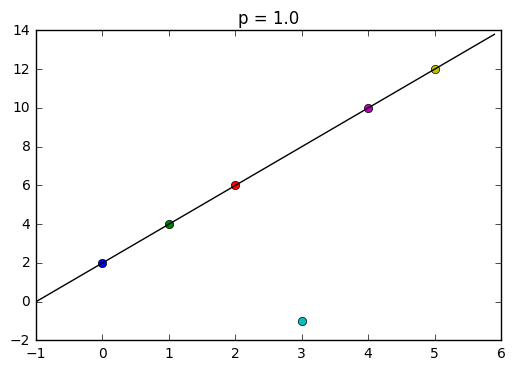

[[ 1.9067699]
 [ 1.8811765]]


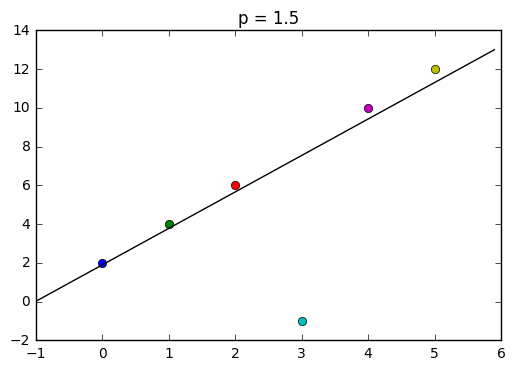

[[ 1.14285717]
 [ 1.74285713]]


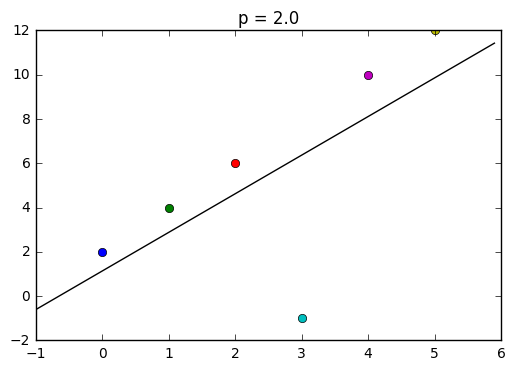

[[ 0.39725168]
 [ 1.73712843]]


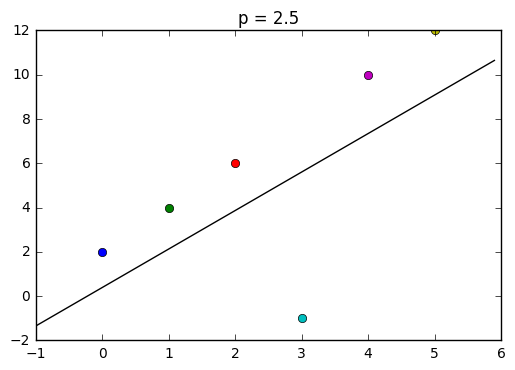

[[-0.13630376]
 [ 1.76026571]]


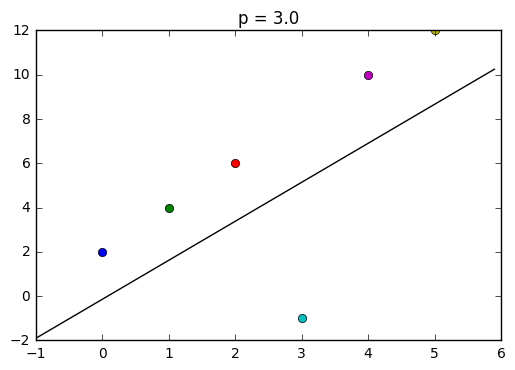

[[-0.51579418]
 [ 1.78580691]]


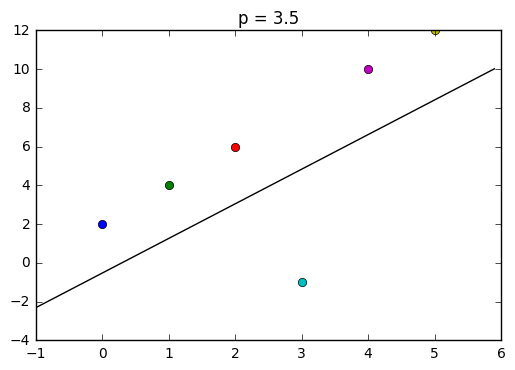

[[-0.79459415]
 [ 1.80844355]]


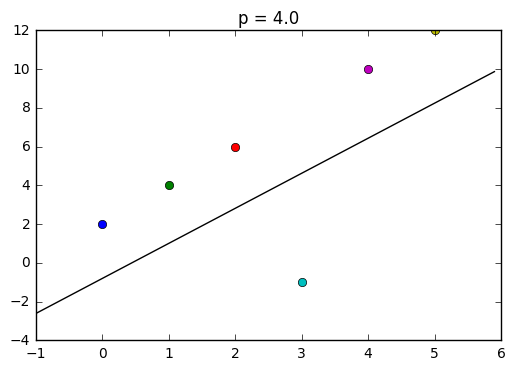

[[-1.00660462]
 [ 1.82758786]]


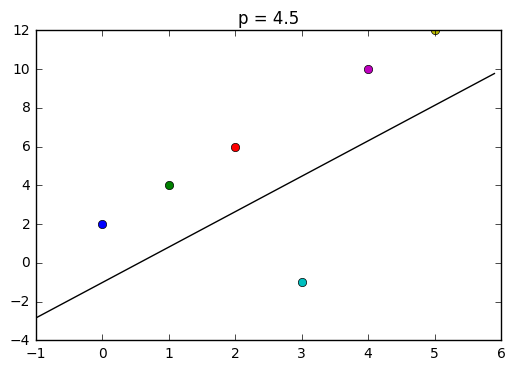

In [7]:

# A toy data set with outliers
x = np.matrix('[0,1,2,3,4,5]').T
y = np.matrix('[2,4,6,-1,10,12]').T

# Degree of the fitted polynomial
degree = 1

N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))

xx = np.matrix(np.arange(-1,6,0.1)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

# Norm parameter
for p in np.arange(1,5,0.5):

    # Construct the problem.
    w = cvx.Variable(degree+1)
    objective = cvx.Minimize(cvx.norm(A*w - y, p))
    #constraints = [0 <= x, x <= 10]
    #prob = Problem(objective, constraints)
    prob = cvx.Problem(objective)

    # The optimal objective is returned by prob.solve().
    result = prob.solve()
    # The optimal value for x is stored in x.value.
    print(w.value)
    # The optimal Lagrange multiplier for a constraint
    # is stored in constraint.dual_value.
    #print(constraints[0].dual_value)

    plt.figure()
    plt.plot(x.T.tolist(), y.T.tolist(), 'o')
    plt.plot(xx, A2*w.value, '-')
    plt.title('p = '+str(p))
    plt.show()

## Overcomplete Representations and regularization

Suppose we are given a point $y$ in two dimensional space and want to represent this point with a linear combination of $N$ vectors $a_i$ for $i=1\dots N$, where $N>2$. We let $A$ be the $2 \times N$ matrix
$$
A = [a_1, a_2,\dots, a_N]
$$

To represent $y$, we need to solve the set of equations
$$y = Aw$$

Clearly, there could be more than one solution, in fact in general there are an infinite number of solutions $w^*$ to this problem, so minimization of the error is not sufficient.

To find a particular solution we may require an additional property from the solution $w^*$, such as having a small norm $\|w\|$. To achieve this, we can try to minimize 

$$
E_{(2,2)}(w) =  \| y - Aw \|_2^2 + \lambda \| w \|_2^2 
$$



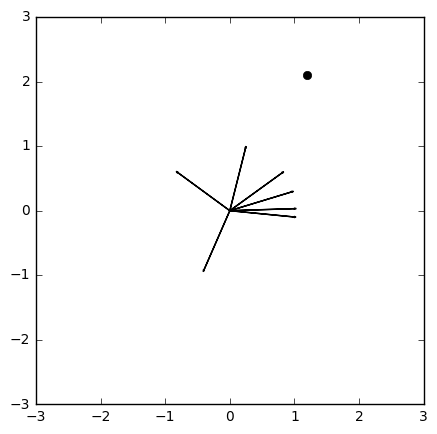

In [6]:
N = 7
#th = np.arange(0, np.pi-np.pi/N, np.pi/N)
th = 2*np.pi*np.random.rand(N)
A = np.vstack((np.cos(th), np.sin(th)))
y = np.mat('[1.2;2.1]')

fig = plt.figure(figsize=(5,5))

for i in range(len(th)):
    plt.arrow(0,0,A[0,i],A[1,i])

plt.plot(y[0],y[1],'ok')
plt.gca().set_xlim((-3,3))
plt.gca().set_ylim((-3,3))
plt.show()


Below, you can experiment by selecting different norms, 
$$
E_{(p,q)}(w) =  \| y - Aw \|_p^2 + \lambda \| w \|_q^2 
$$


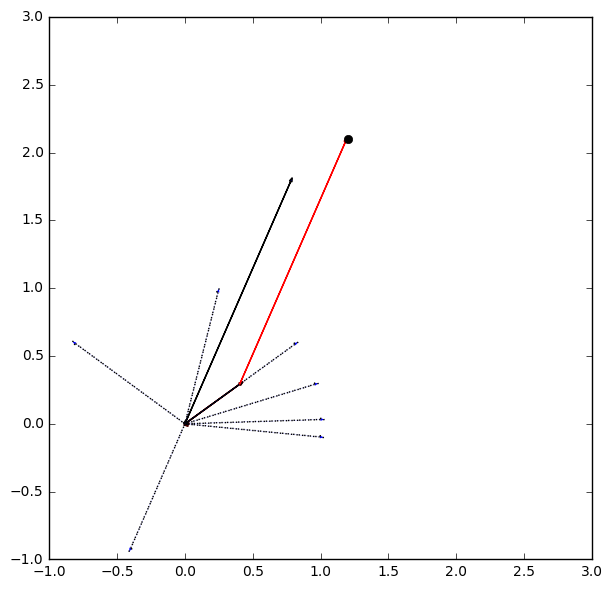

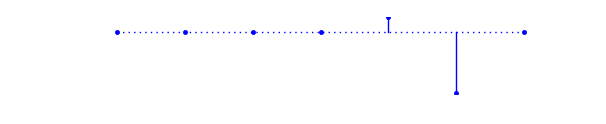

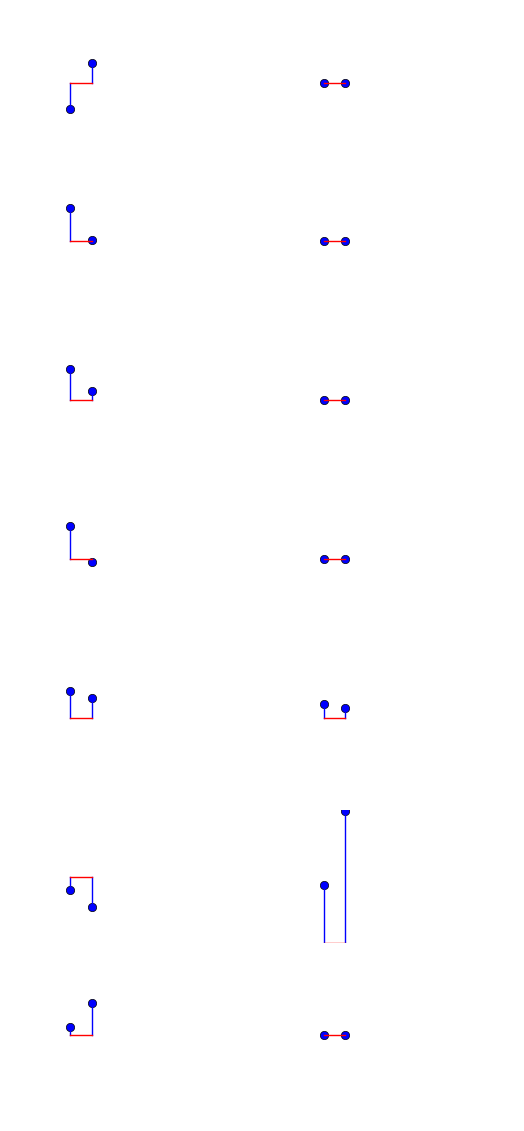

In [10]:
## Regularization
lam = 0.05

p = 2
q = 1


def Visualize_Basis(A,w=None, x=None,ylim=[-0.5, 1.1]):
    K = A.shape[1]
    if x is None:
        x = np.arange(0,A.shape[0])
        
    if w is None:
        plt.figure(figsize=(6,2*K))
        #plt.show()
        for i in range(K):
            plt.subplot(K,1,i+1)
            plt.stem(x,A[:,i])
            plt.gcf().gca().set_xlim([-1, K+2])
            plt.gcf().gca().set_ylim(ylim)
            plt.gcf().gca().axis('off')

        plt.show()
    else: # if w is not None
        plt.figure(figsize=(6,2*K))
        for i in range(K):
            plt.subplot(K,2,2*i+1)
            plt.stem(x,A[:,i])
            plt.gcf().gca().set_xlim([-1, K+2])
            plt.gcf().gca().set_ylim(ylim)
            plt.gcf().gca().axis('off')

            plt.subplot(K,2,2*i+2)
            plt.stem(x,A[:,i]*w[i])
            plt.gcf().gca().set_xlim([-1, K+2])
            if np.abs(w[i])<1:
                plt.gcf().gca().set_ylim(ylim)
            plt.gcf().gca().axis('off')

        plt.show()        

# Construct the problem.
w = cvx.Variable(len(th))

objective = cvx.Minimize(cvx.norm(A*w - y, p)**p + lam*cvx.norm(w, q)**q)
constraints = []
prob = cvx.Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve()


fig = plt.figure(figsize=(7,7))
ws = np.array(w.value)

v = np.zeros(2)
for i in range(len(th)):
    dx = A[0,i]*ws[i]
    dy = A[1,i]*ws[i]
    plt.arrow(v[0],v[1], dx[0], dy[0],color='red')
    v[0] = v[0]+dx
    v[1] = v[1]+dy
    plt.arrow(0,0, dx[0], dy[0])
    plt.arrow(0,0,A[0,i],A[1,i],linestyle=':')


plt.plot(y[0],y[1],'ok')
plt.gca().set_xlim((-1,3))
plt.gca().set_ylim((-1,3))
plt.show()

fig = plt.figure(figsize=(7,1))
plt.stem(ws, markerfmt='.b', basefmt='b:')
plt.axes().set_xlim((-1,N))
plt.gca().axis('off')

plt.show()

Visualize_Basis(A,w=ws,ylim=[-2,2])

## Outlier detection with Basis Regression

Set up some data with outliers

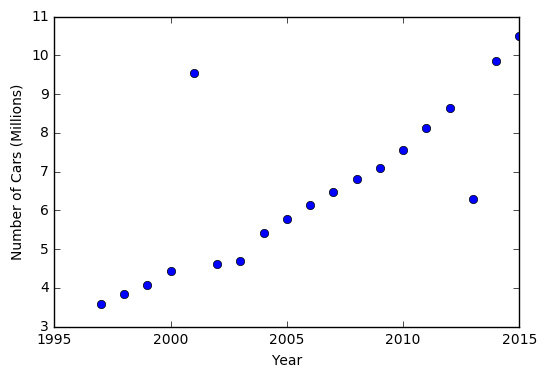

In [10]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
BaseYear = 1995
x = np.matrix(df_arac.Year[31:]).T-BaseYear
y = np.matrix(df_arac.Car[31:]).T/1000000.0

# Introduce some artificial outliers
y[-3] = y[-3]-3
y[4] = y[4]+5

plt.plot(x+BaseYear, y, 'o')
plt.xlabel('Year')
plt.ylabel('Number of Cars (Millions)')

plt.show()

## A model for outlier detection
A design matrix with a union of bases
* Smooth low order polynomials for regular behavior $A_{\text smooth}$
* Spikes at every time point to model outliers $A_{\text spike}$

$$
y \approx A_{\text smooth} w_{\text smooth} + A_{\text spike} w_{\text spike}
$$

* Leads to an interpretable decomposition in terms of actual signal and noise

* Write in the generic form $y = Aw$ by
$$
A = \left[A_{\text smooth}\; A_{\text spike}\right] \left(
\begin{array}{c}
 w_{\text smooth} \\ w_{\text spike}
\end{array}
\right)
$$

* Minimize the following objective
$$
E(w_{\text smooth}, w_{\text spike}) = \|y - A_{\text smooth} w_{\text smooth} - A_{\text spike} w_{\text spike} \|_{2}^2 + \lambda \|w_{\text spike}\|_1
$$

In [12]:
def triag_ones(N):
    A = np.zeros((N,N))
    for i in range(N):
        A[i:,i] = np.ones(N-i)
    return A


xx = np.matrix(np.arange(1995,2018,0.5)).T-BaseYear
N = len(x)
degree = 4
B = np.hstack((np.power(x,i) for i in range(degree+1)))
# Make an orthogonal basis that spans the same column space
Q, R, = np.linalg.qr(B)
# Append an extra identity basis for outliers
A = np.hstack((Q, np.eye(N)))
B2 = np.hstack((np.power(xx,i) for i in range(degree+1)))
A2 = B2*R.I

Visualize_Basis(A,x=x)

NameError: name 'BaseYear' is not defined

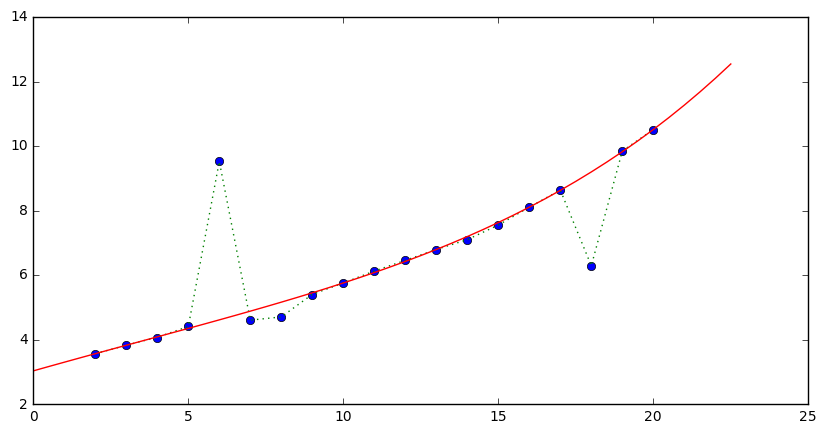

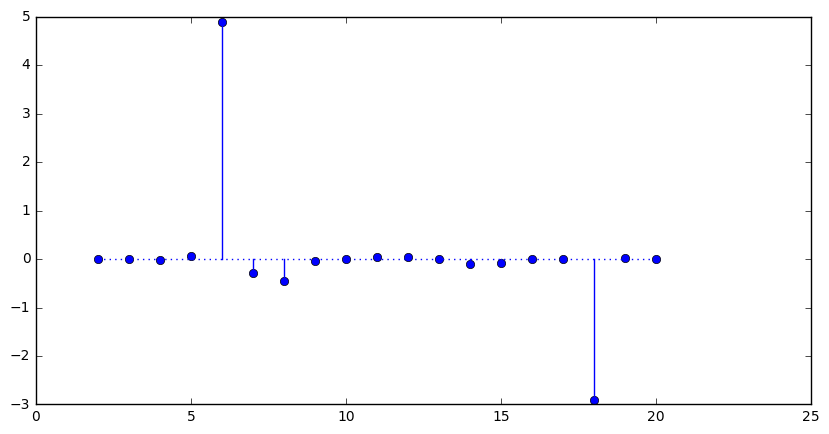

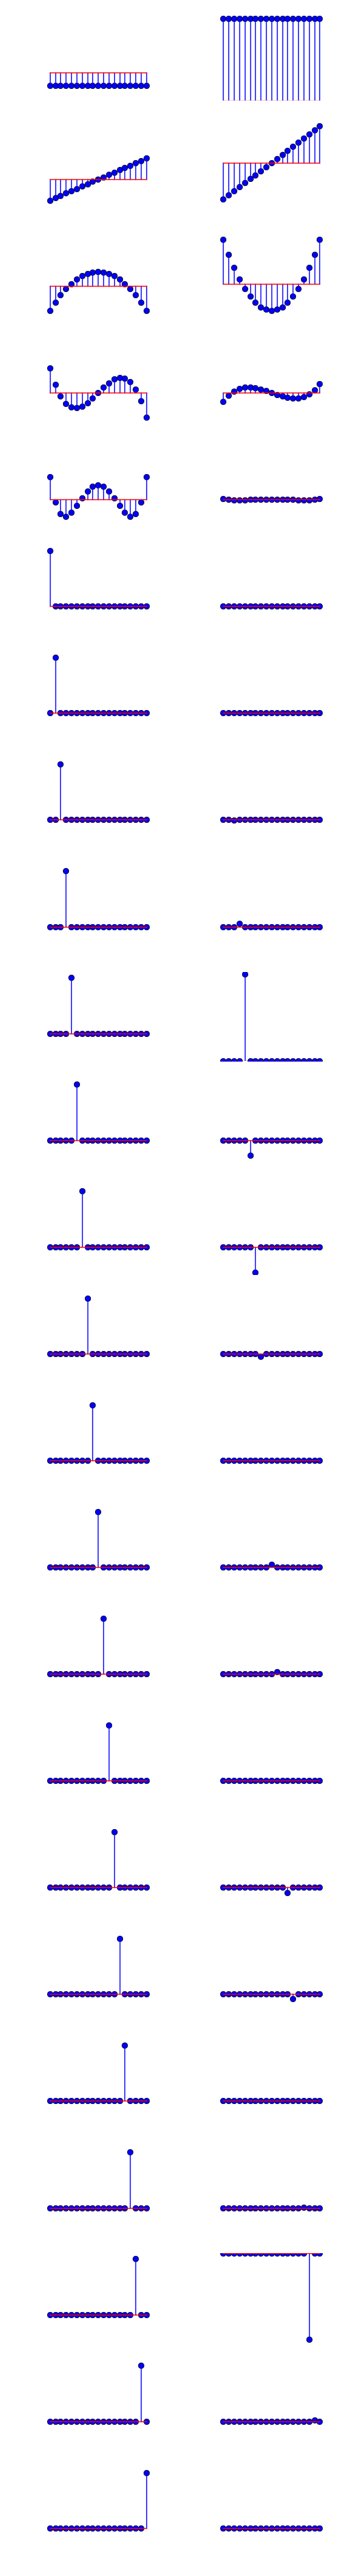

In [12]:
lam = 0.02

# Construct the problem.
w = cvx.Variable(degree+1+N)
p = 2
q = 1

objective = cvx.Minimize(cvx.norm(A*w - y, p)**p + lam*cvx.norm(w[degree+1:], q)**q)
constraints = []
prob = cvx.Problem(objective, constraints)
# The optimal objective is returned by prob.solve().
result = prob.solve()

plt.figure(figsize=(10,5))
#plt.subplot(2,1,1)
plt.plot(x, y, 'o')
plt.plot(x, A*w.value, 'g:')
plt.plot(xx, A2*w.value[0:degree+1,0], 'r-')
fig.gca().set_xlim((0,25))
plt.show()

fig = plt.figure(figsize=(10,5))
#plt.subplot(2,1,2)
# The optimal value for w is stored in w.value.
plt.stem(x,w.value[degree+1:],basefmt=':')
fig.gca().set_xlim((0,25))
plt.show()

Visualize_Basis(A,x=x,w=np.array(w.value), ylim=[-0.5, 1.1])



## Changepoint detection

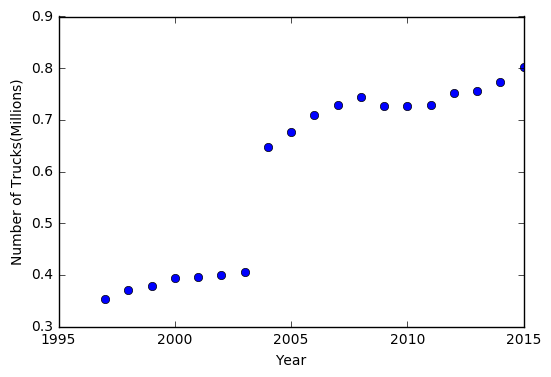

In [9]:
x = np.matrix(df_arac.Year[31:]).T-BaseYear
y = np.matrix(df_arac.Truck[31:]).T/1000000.0



plt.plot(x+BaseYear, y, 'o')
plt.xlabel('Year')
plt.ylabel('Number of Trucks(Millions)')

plt.show()

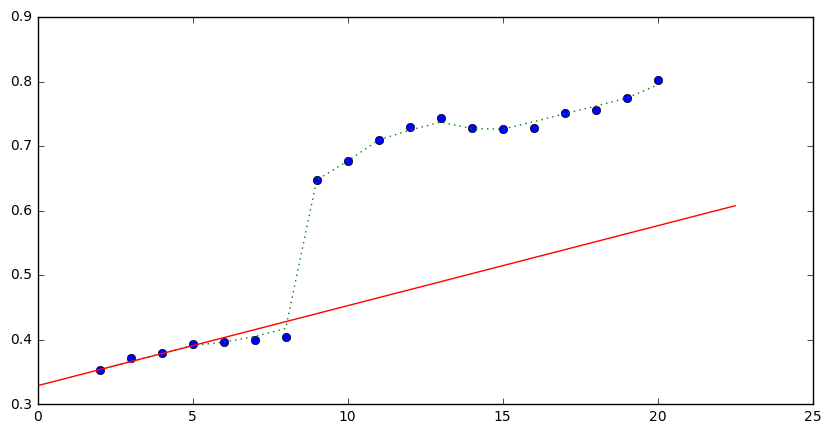

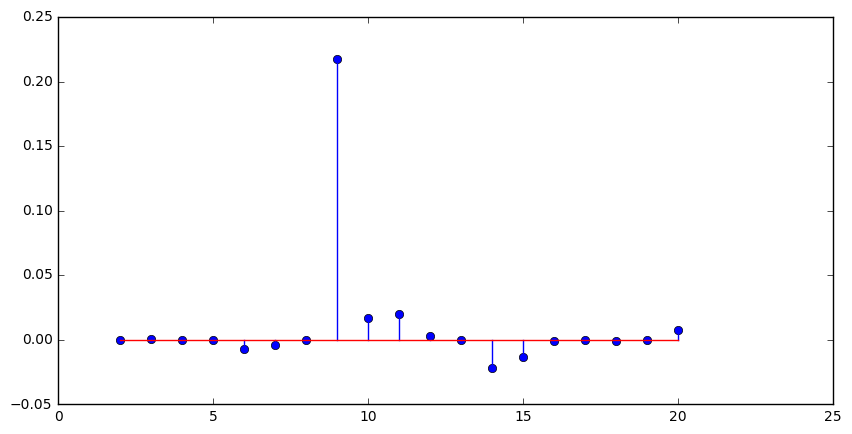

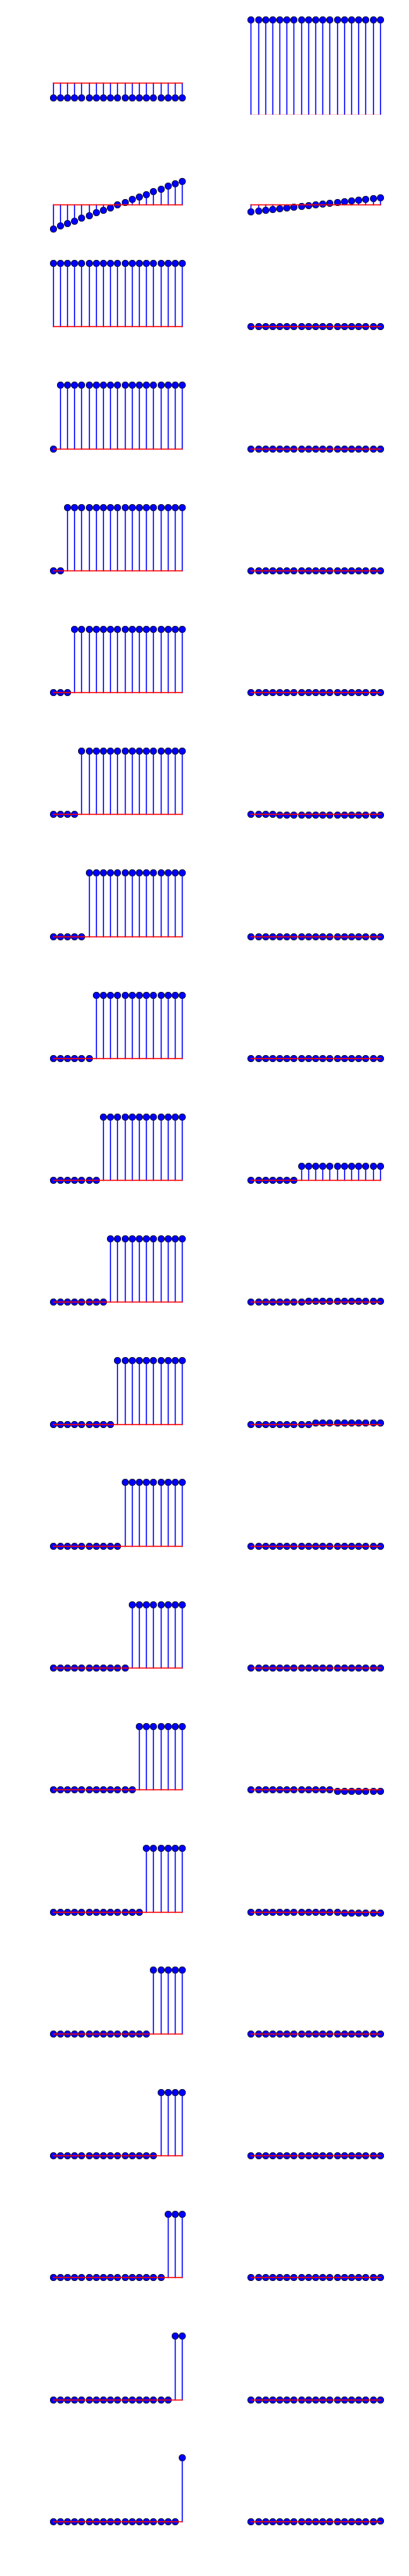

In [10]:
degree = 1
lam = 1

p = 1
q = 1


xx = np.matrix(np.arange(1995,2018,0.5)).T-BaseYear
N = len(x)
B = np.hstack((np.power(x,i) for i in range(degree+1)))
# Make an orthogonal basis that spans the same column space
Q, R, = np.linalg.qr(B)
# Append an extra identity basis for outliers
A = np.hstack((Q, triag_ones(N)))
B2 = np.hstack((np.power(xx,i) for i in range(degree+1)))
A2 = B2*R.I

# Construct the problem.
w = cvx.Variable(degree+1+N)

objective = cvx.Minimize(cvx.norm(A*w - y, p)**p + lam*cvx.norm(w[degree+1:], q)**q)
constraints = []
prob = cvx.Problem(objective, constraints)
# The optimal objective is returned by prob.solve().
result = prob.solve()

plt.figure(figsize=(10,5))
#plt.subplot(2,1,1)
plt.plot(x, y, 'o')
plt.plot(x, A*w.value, ':')
plt.plot(xx, A2*w.value[0:degree+1,0], '-')
fig.gca().set_xlim((0,25))
plt.show()

fig = plt.figure(figsize=(10,5))
#plt.subplot(2,1,2)
# The optimal value for w is stored in w.value.
plt.stem(x,w.value[degree+1:])
fig.gca().set_xlim((0,25))

# Visualize the Basis
K = A.shape[1]
plt.show()

plt.figure(figsize=(6,2*K))
for i in range(K):
    plt.subplot(K,2,2*i+1)
    plt.stem(x,A[:,i])
    plt.gcf().gca().set_xlim([0, K+2])
    plt.gcf().gca().set_ylim([-0.5, 1.1])
    plt.gcf().gca().axis('off')

    plt.subplot(K,2,2*i+2)
    plt.stem(x,A[:,i]*w.value[i,0])
    plt.gcf().gca().set_xlim([0, K+2])
    if np.abs(w.value[i,0])<1:
        plt.gcf().gca().set_ylim([-0.5, 1.1])
    plt.gcf().gca().axis('off')

    
plt.show()

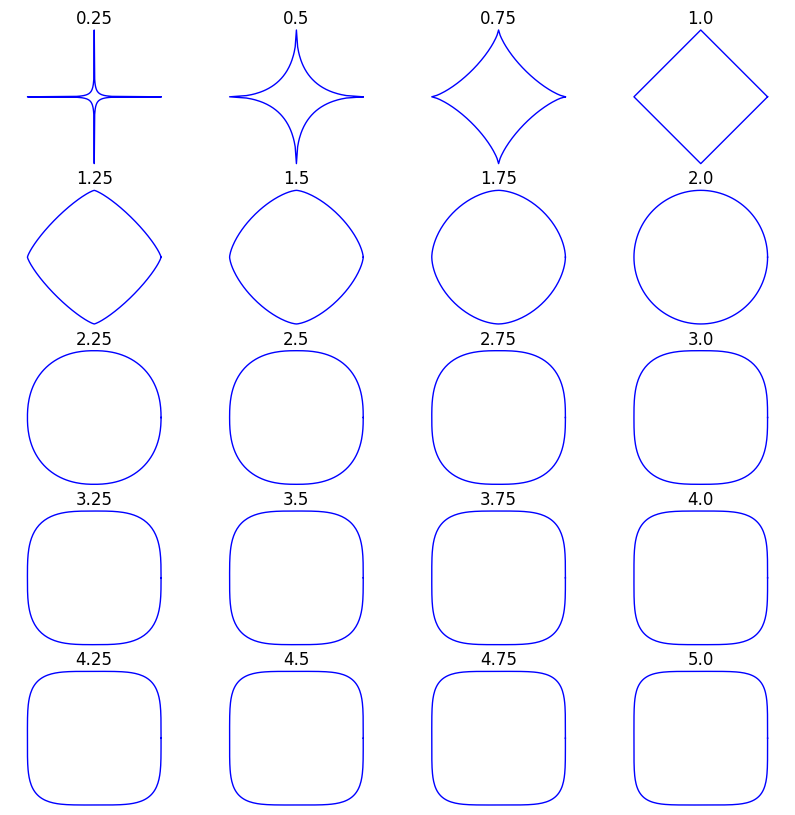

In [11]:
%run plot_normballs.py

## Feature selection

/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


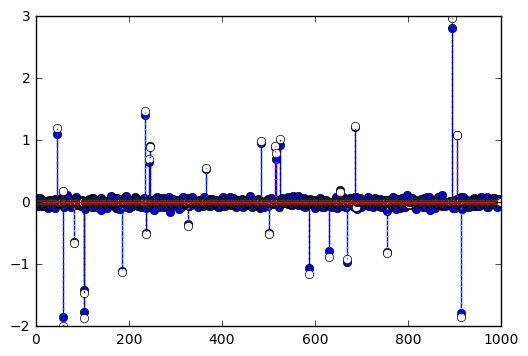

In [12]:

p = 2
q = 2

K = 1000
N = 1000
R = 30
w_true = np.zeros(K)
idx = np.random.choice(range(K), size=R)
w_true[idx] = np.random.randn(K,1)
A = np.random.randn(N, K)
y = 0.3*np.random.randn(N) + A.dot(w_true)

# Construct the problem.
w = cvx.Variable(K,1)
objective = cvx.Minimize(cvx.norm(A*w - y, p)**p + lam*cvx.norm(w, q)**q)
prob = cvx.Problem(objective, constraints)
# The optimal objective is returned by prob.solve().
result = prob.solve()

plt.stem(w.value)
plt.stem(range(K),w_true.T,':',markerfmt='wo')
plt.show()
#print w.value
#print w_true

## Well log data

In [19]:
import pandas as pd

lam = 1.2
p = 2
q = 1

df_welllog = pd.read_csv(u'data/well-log.csv',names=['y'])
y = np.array(df_welllog.y)[::4]/100000.
N = len(y)
A = triag_ones(N)
K = N


# Construct the problem.
w = cvx.Variable(K,1)
objective = cvx.Minimize(cvx.norm(A*w - y, p)**p + lam*cvx.norm(w, q)**q)
prob = cvx.Problem(objective, constraints)
# The optimal objective is returned by prob.solve().
result = prob.solve()

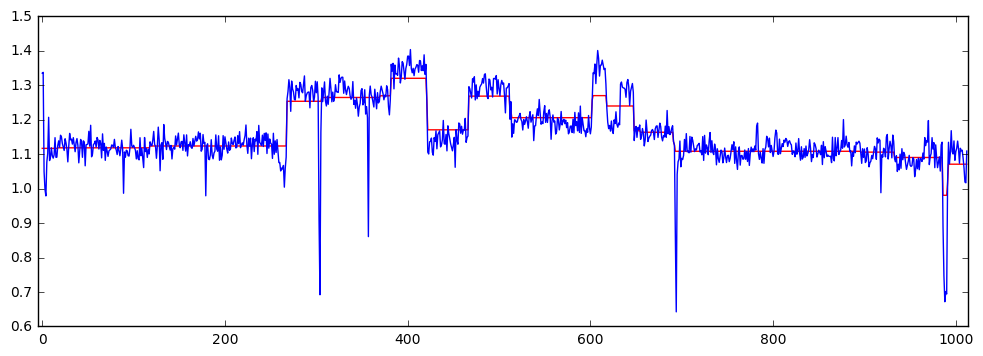

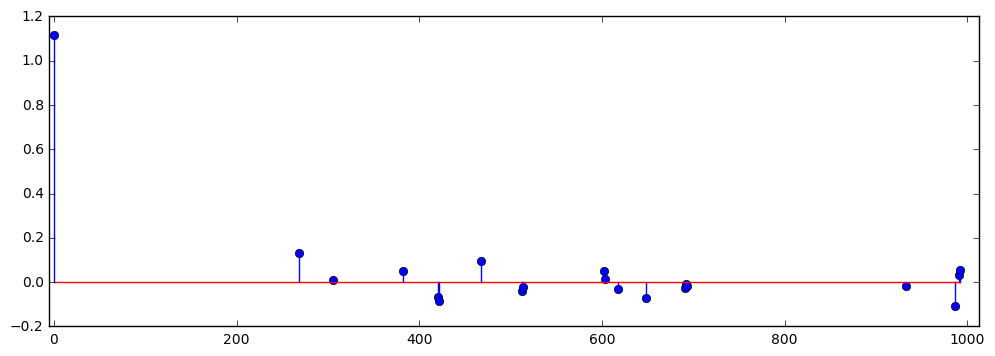

In [20]:
thr = 0.01
plt.figure(figsize=(12,4))
plt.plot(A.dot(w.value),'r')
plt.plot(y)
plt.xlim((-5,N))
plt.figure(figsize=(12,4))
idx = np.where(np.abs(w.value)>thr)[0]
plt.stem(idx,w.value[idx])
plt.xlim((-5,N))
plt.show()